## Chapter 1

In [ ]:
# We can define these here as as required
using BenchmarkTools, UnicodePlots, PyPlot

# We need these as some functions have moved from Base to Stdlib
#
using Printf

### Estimating Pi

A simple simple estimation of PI by generating pairs of random numbers (x,y).

This are in the unit square and the proportion of pairs with line in the unit circle will be π/4.

In [10]:
# Define a function to compute the sum of the squares of (x,y)

sumsq(x,y) = x*x + y*y;

In [11]:
# Set the number of trials and initialise the counter
# Using zero(Integer) will ensure the counter is an integer

N = 10^8; 
K = zero(Integer);

In [12]:
using Printf

In [13]:
# Sum the number of pairs which lie within the inscribed circle

for i = 1:N
  if sumsq(rand(), rand()) < 1.0
    K += 1
  end
end

# ... and output the value for PI

@printf "Estimate of PI for %d trials is %8.5f\n" N 4.0*(K / N);

Estimate of PI for 100000000 trials is  3.14148


In [14]:
# We can time this using the @time macro
# Note that his takes some time, will be different in the REPL

K = zero(Integer);

@time for i = 1:N
  if sumsq(rand(), rand()) < 1.0
    K += 1
  end
end

 13.401923 seconds (378.54 M allocations: 7.131 GiB, 9.56% gc time)


In [15]:
# Now need the global K to access top level varables in the REPL
# The error message is less than informative
# i.e. UndefVarError: K not defined

# Try v0.7 to get a warning and understand the problem
# ┌ Warning: Deprecated syntax `implicit assignment to global variable `K``.
# │ Use `global K` instead.
# └ @ none:0

In [16]:
# This ONLY applies to the top level loops
# So wrapping in let/end, begin/end block is OK, since K is in local scope

# This is by using a function and passing K,N as parameters
# Here is a contrived example which demonstrates this:

while (true)
    N = 1000000
    K = zero(Integer)
    for i = 1:N
        if sumsq(rand(), rand()) < 1.0
          K += 1
        end
    end
    println(4.0*(K/N))
    break
end

3.137408


In [17]:
# We can rewrite as a generator expressions
# This does not require the variable 'K'
#
# Comprehensions can also be written without the enclosing square brackets, 
# producing an object known as a generator.

((rand()^2 + rand()^2) < 1.0 for i = 1:N)

Base.Generator{UnitRange{Int64},var"#1#2"}(var"#1#2"(), 1:1000000)

In [18]:
# The generator can be "evaluated" as the argument to an aggregate function

count((rand()^2 + rand()^2) < 1.0 for i = 1:N) * 4 / N

3.141928

In [19]:
# And this runs much more quickly with a much better memory allocation

@time count((rand()^2 + rand()^2) < 1.0 for i = 1:N) * 4 / N

  0.062650 seconds (28.17 k allocations: 1.419 MiB)


3.138616

In [20]:
# JULIA_HOME is not longer defined in Version 1
# See: https://docs.julialang.org/en/v1/manual/environment-variables/
#
# JULIA_BINDIR sets Sys.BINDIR

Sys.BINDIR

"/Applications/Julia-1.5.app/Contents/Resources/julia/bin"

---

### Basel problem

The Basel problem is a problem in mathematical analysis with relevance to number theory, 
first posed by Pietro Mengoli in 1644 and solved by Leonhard Euler in 1734

It asks for the precise summation of the reciprocals of the squares of the natural numbers

## $\sum_{i=1}^\infty \frac{1}{i^2} = \frac{\pi^2}{6}$

In [21]:
# Rather than just using the @time macro we can get a more accuracy timing using the BenchmarkTools package

using BenchmarkTools

In [22]:
# Define the function to sum the series
# It converges very slowly

function basel(N::Integer)
  @assert N > 0
  s = 0.0
  for i = 1:N
    s += 1.0/float(i)^2     
  end 
  return s
end

basel (generic function with 1 method)

In [23]:
basel(10^8)   # Evaluate it over 10^8 terms

1.644934057834575

In [24]:
π*π/6.0    # Compare this to the analytic solution

1.6449340668482264

In [25]:
# Use the BenchmarkTools macro @benchmark to get more unbiased timings

@benchmark basel(10^8) samples=10

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     484.345 ms (0.00% GC)
  median time:      486.278 ms (0.00% GC)
  mean time:        487.037 ms (0.00% GC)
  maximum time:     496.635 ms (0.00% GC)
  --------------
  samples:          10
  evals/sample:     1

---

### Plotting using text characters

A simple plot can be created using Unicode Plots for the expression: <br/>$x * exp(-0.03x) * sin(0.03x)$


In [26]:
using UnicodePlots

In [27]:
# Generate an array of the numbers from 1 to 100
# The ordinate value is create using a list comprehensive

x = collect(1:100);
y = [x[i]*sin(0.3*x[i])*exp(-0.03*x[i]) for i = 1:length(x)];

myPlot = lineplot(x, y, title = "My First Plot", name = "C01")

                     My First Plot
       ┌────────────────────────────────────────┐    
    20 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ C01
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⡆⠀⠀⠀⠀⠀⠀⡎⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡎⠀⢱⠀⠀⠀⠀⠀⢸⠀⠸⡀⠀⠀⠀⠀⠀⡔⠱⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⡤⡀⠀⠀⠀⠀⢠⠃⠀⠘⡄⠀⠀⠀⠀⡎⠀⠀⡇⠀⠀⠀⠀⢠⠃⠀⢣⠀⠀⠀⠀⠀⡠⠊⢆⠀⠀⠀│    
       │⠀⡞⠀⢱⠀⠀⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⢀⠇⠀⠀⢱⠀⠀⠀⠀⡜⠀⠀⠸⡀⠀⠀⠀⢀⠇⠀⠘⡄⠀⠀│    
       │⠮⠤⠤⠤⡧⠤⠤⠤⡧⠤⠤⠤⢵⠤⠤⠤⢼⠤⠤⠤⠼⡤⠤⠤⢤⠧⠤⠤⠤⢧⠤⠤⠤⡼⠤⠤⠤⢼⡤⠤│    
       │⠀⠀⠀⠀⢸⠀⠀⢠⠇⠀⠀⠀⢸⠀⠀⠀⡎⠀⠀⠀⠀⡇⠀⠀⢸⠀⠀⠀⠀⢸⡀⠀⢠⠃⠀⠀⠀⠀⢇⠀│    
       │⠀⠀⠀⠀⠈⡆⠀⢸⠀⠀⠀⠀⠀⡇⠀⢀⡇⠀⠀⠀⠀⢱⠀⠀⡇⠀⠀⠀⠀⠀⢇⢀⡎⠀⠀⠀⠀⠀⠀⠓│    
       │⠀⠀⠀⠀⠀⢣⢀⠇⠀⠀⠀⠀⠀⢣⠀⢸⠀⠀⠀⠀⠀⠈⡆⢰⠃⠀⠀⠀⠀⠀⠈⠊⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠀⠀⠘⡄⡇⠀⠀⠀⠀⠀⠀⠘⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
   -20 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
       └────────────────────────────────────────┘    
       0                                      1

In [28]:
# Alternatively this can be done using a map() construction

t = collect(0.0:0.1:10.0);
y =  map(x -> x*sin(3.0*x)*exp(-0.3*x), t);
myPlot = lineplot(t, y, title = "My Second Plot", name = "c01")

                   My Second Plot
      ┌────────────────────────────────────────┐    
    2 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ c01
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⡆⠀⠀⠀⠀⠀⠀⡎⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡎⠀⢱⠀⠀⠀⠀⠀⢸⠀⠸⡀⠀⠀⠀⠀⠀⡔⠱⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⡤⡀⠀⠀⠀⠀⢠⠃⠀⠘⡄⠀⠀⠀⠀⡎⠀⠀⡇⠀⠀⠀⠀⢠⠃⠀⢣⠀⠀⠀⠀⠀⡠⠊⢆⠀⠀⠀│    
      │⠀⡞⠀⢱⠀⠀⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⢀⠇⠀⠀⢱⠀⠀⠀⠀⡜⠀⠀⠸⡀⠀⠀⠀⢀⠇⠀⠘⡄⠀⠀│    
      │⠮⠤⠤⠤⡧⠤⠤⠤⡧⠤⠤⠤⢵⠤⠤⠤⢼⠤⠤⠤⠼⡤⠤⠤⢤⠧⠤⠤⠤⢧⠤⠤⠤⡼⠤⠤⠤⢼⡤⠤│    
      │⠀⠀⠀⠀⢸⠀⠀⢠⠇⠀⠀⠀⢸⠀⠀⠀⡎⠀⠀⠀⠀⡇⠀⠀⢸⠀⠀⠀⠀⢸⡀⠀⢠⠃⠀⠀⠀⠀⢇⠀│    
      │⠀⠀⠀⠀⠈⡆⠀⢸⠀⠀⠀⠀⠀⡇⠀⢀⡇⠀⠀⠀⠀⢱⠀⠀⡇⠀⠀⠀⠀⠀⢇⢀⡎⠀⠀⠀⠀⠀⠀⠓│    
      │⠀⠀⠀⠀⠀⢣⢀⠇⠀⠀⠀⠀⠀⢣⠀⢸⠀⠀⠀⠀⠀⠈⡆⢰⠃⠀⠀⠀⠀⠀⠈⠊⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠀⠀⠘⡄⡇⠀⠀⠀⠀⠀⠀⠘⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
   -2 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
      └────────────────────────────────────────┘    
      0                                       10

---

### Plotting an trajectories in an *Asian* option using PyPlot

In [29]:
using PyPlot
plt = PyPlot   # Will get function name clashes with UnicodePlots.

PyPlot

In [30]:
S0  = 100;      # Spot price
K   = 102;      # Strike price
r   = 0.05;     # Risk free rate
q   = 0.0;      # Dividend yield
v   = 0.2;      # Volatility
tma = 0.25;     # Time to maturity
T   = 90;       # Number of time steps

In [31]:
dt  = tma/T;
N = T + 1;
x = collect(0:T);

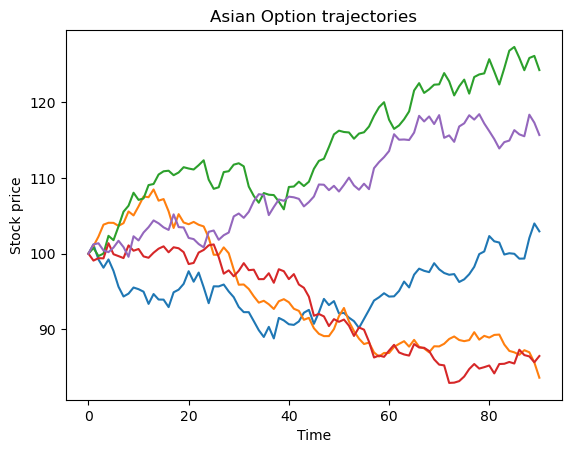

In [32]:
# Qualify the function calls since UnicodePlot has exports same functions into Main. 

plt.title("Asian Option trajectories");
plt.xlabel("Time");
plt.ylabel("Stock price");

for k = 1:5
  S = zeros(Float64,N)
  S[1] = S0;
  dW = randn(N)*sqrt(dt);
  [ S[t] = S[t-1] * (1 + (r - q - 0.5*v*v)*dt + v*dW[t] + 0.5*v*v*dW[t]*dW[t]) for t=2:N ]
  plt.plot(x,S)
end

# Notice that the reference to the PyPlot object is in scope inside this loop
# The same is true when passing an array into a loop
# Confusing YES?
